In [1]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.3.2'

In [2]:
# Load dataset 
import pandas as pd
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
df = pd.read_csv("data/feature_volta.csv")
df.head()

,Unnamed: 0,station_name,province,operator_enc,kW_enc_kW_other,kW_enc_50,kW_enc_120,kW_enc_25,kw_type_kW_other_Terra124_CC,kw_type_50_type_other,kw_type_120_type_other,kw_type_120_Terra124_CC,kw_type_50_Terra54_CJG,kw_type_50_Terra54_CJ,kw_type_25_CCS,kw_type_kW_other_type_other,opening_time_enc_1,opening_time_enc_0,cnt_chargers,p24,Station_Name_x,pct_utilized,utilize,Station_Name_y,growth_rate,normalized_growth_rate,zone,convenience_store,restaurant,coffee_shop,restroom,roof,lounge,security_lighting,tire_inflation_service,car_wash_service,massage_shop,market,department_store,laundry_service,government_office,hospital,hotel,car_service_center,bank_atm,souvenir_shop,diy_material_shop,beauty_salon,basic_services,food_beverages,leisure_entertainment,shopping,health_government_laundry,car_services,zone_2,zone_0,zone_1
0,0,PEA VOLTA 7-Eleven ตะพานหิน,พิจิตร,pea,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1.0,PEA VOLTA 7-Eleven ตะพานหิน,7.680,0.07680,PEA VOLTA 7-Eleven ตะพานหิน,0.129575,0.104688,2,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,2,0,1,1,0,1,0,0
1,1,PEA VOLTA ตะพานหิน,พิจิตร,pea,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1.0,PEA VOLTA ตะพานหิน,7.780,0.07780,PEA VOLTA ตะพานหิน,0.292207,0.188036,2,0,1,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,2,1,1,0,1,1,1,0,0
2,2,PEA VOLTA บางจาก บึงนาราง,พิจิตร,gas_station,0,2,0,0,0,0,0,0,1,1,0,0,2,0,2,1.0,PEA VOLTA บางจาก บึงนาราง,9.175,0.09175,PEA VOLTA บางจาก บึงนาราง,0.507150,0.254066,2,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,0,1,0,2,1,0,0
3,3,PEA VOLTA เมืองพิจิตร,พิจิตร,pea,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1.0,PEA VOLTA เมืองพิจิตร,14.170,0.14170,PEA VOLTA เมืองพิจิตร,0.560236,0.265683,2,1,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,2,1,1,1,0,1,0,0
4,4,PEA VOLTA 7-Eleven บางสะพานน้อย,ประจวบคีรีขันธ์,other_operator,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1.0,PEA VOLTA 7-Eleven บางสะพานน้อย,7.870,0.07870,PEA VOLTA 7-Eleven บางสะพานน้อย,0.137662,0.109865,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,3,0,0,1,1,0,1,0


In [3]:
df.columns.to_list()

['Unnamed: 0',
 'station_name',
 'province',
 'operator_enc',
 'kW_enc_kW_other',
 'kW_enc_50',
 'kW_enc_120',
 'kW_enc_25',
 'kw_type_kW_other_Terra124_CC',
 'kw_type_50_type_other',
 'kw_type_120_type_other',
 'kw_type_120_Terra124_CC',
 'kw_type_50_Terra54_CJG',
 'kw_type_50_Terra54_CJ',
 'kw_type_25_CCS',
 'kw_type_kW_other_type_other',
 'opening_time_enc_1',
 'opening_time_enc_0',
 'cnt_chargers',
 'p24',
 'Station_Name_x',
 'pct_utilized',
 'utilize',
 'Station_Name_y',
 'growth_rate',
 'normalized_growth_rate',
 'zone',
 'convenience_store',
 'restaurant',
 'coffee_shop',
 'restroom',
 'roof',
 'lounge',
 'security_lighting',
 'tire_inflation_service',
 'car_wash_service',
 'massage_shop',
 'market',
 'department_store',
 'laundry_service',
 'government_office',
 'hospital',
 'hotel',
 'car_service_center',
 'bank_atm',
 'souvenir_shop',
 'diy_material_shop',
 'beauty_salon',
 'basic_services',
 'food_beverages',
 'leisure_entertainment',
 'shopping',
 'health_government_laundry

In [4]:
selected_columns = [
 'station_name',
 'province',
 'operator_enc',
 'kW_enc_kW_other',
 'kW_enc_50',
 'kW_enc_120',
 'kW_enc_25',
 'opening_time_enc_1',
 'cnt_chargers',
 'p24',
 'pct_utilized',
 'growth_rate',
 'zone',
 'basic_services',
 'food_beverages',
 'leisure_entertainment',
 'shopping',
 'health_government_laundry',
 'car_services',
]
data = df[selected_columns].copy()

In [5]:
data.dropna(subset=['pct_utilized'], inplace=True)
data

,station_name,province,operator_enc,kW_enc_kW_other,kW_enc_50,kW_enc_120,kW_enc_25,opening_time_enc_1,cnt_chargers,p24,pct_utilized,growth_rate,zone,basic_services,food_beverages,leisure_entertainment,shopping,health_government_laundry,car_services
0,PEA VOLTA 7-Eleven ตะพานหิน,พิจิตร,pea,0,0,1,0,1,1,1.0,7.680,0.129575,2,3,2,0,1,1,0
1,PEA VOLTA ตะพานหิน,พิจิตร,pea,0,0,0,1,1,1,1.0,7.780,0.292207,2,2,1,1,0,1,1
2,PEA VOLTA บางจาก บึงนาราง,พิจิตร,gas_station,0,2,0,0,2,2,1.0,9.175,0.507150,2,2,1,0,1,0,2
3,PEA VOLTA เมืองพิจิตร,พิจิตร,pea,0,0,0,1,1,1,1.0,14.170,0.560236,2,3,2,1,1,1,0
4,PEA VOLTA 7-Eleven บางสะพานน้อย,ประจวบคีรีขันธ์,other_operator,0,0,1,0,1,1,1.0,7.870,0.137662,0,1,3,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,PEA VOLTA เมืองมุกดาหาร,มุกดาหาร,pea,0,2,0,0,2,2,1.0,4.855,0.152328,2,3,0,1,0,1,0
405,PEA VOLTA เมืองสมุทรสงคราม,สมุทรสงคราม,pea,0,2,0,0,2,2,1.0,5.960,0.196684,1,3,1,1,0,1,0
406,PEA VOLTA เมืองอำนาจเจริญ,อำนาจเจริญ,pea,0,2,0,0,2,2,1.0,3.705,0.119103,2,3,1,1,0,1,1
407,PEA VOLTA เมืองอุตรดิตถ์,อุตรดิตถ์,pea,0,2,0,0,2,2,1.0,12.180,0.451087,2,3,2,1,2,1,2


In [6]:
# import pycaret regression and init setup
from pycaret.regression import *
ignore_columns = ["station_name","province"]
s = setup(data, target = 'pct_utilized',ignore_features=ignore_columns, session_id = 123)

,Description,Value
0,Session id,123
1,Target,pct_utilized
2,Target type,Regression
3,Original data shape,"(407, 19)"
4,Transformed data shape,"(407, 19)"
5,Transformed train set shape,"(284, 19)"
6,Transformed test set shape,"(123, 19)"
7,Ignore features,2
8,Numeric features,15
9,Categorical features,1


In [7]:
# compare baseline models
top5 = compare_models(n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,2.1778,8.2450,2.8132,0.7068,0.3231,0.4214,0.0160
rf,Random Forest Regressor,2.0056,8.7183,2.8687,0.6895,0.2651,0.2785,0.0330
et,Extra Trees Regressor,2.0231,9.0203,2.9231,0.6752,0.2605,0.2704,0.0270
gbr,Gradient Boosting Regressor,2.0992,9.3908,2.9828,0.6752,0.2749,0.2939,0.0150
lightgbm,Light Gradient Boosting Machine,2.2129,9.6025,3.0046,0.6704,0.3010,0.3490,0.1020
ridge,Ridge Regression,2.5776,12.7272,3.4789,0.5590,0.3594,0.4863,0.0070
br,Bayesian Ridge,2.5701,12.8576,3.4948,0.5504,0.3535,0.4729,0.0100
lr,Linear Regression,2.5745,13.3995,3.5645,0.5199,0.3528,0.4657,0.2930
huber,Huber Regressor,2.5606,13.5482,3.5798,0.5184,0.3331,0.4184,0.0150
dt,Decision Tree Regressor,2.6662,17.5569,4.0840,0.3754,0.3691,0.3582,0.0090


In [8]:
# tune models
tuned_top5 = [tune_model(i) for i in top5]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3551,16.4314,4.0536,0.6834,0.4101,0.5499
1,2.2304,7.6956,2.7741,0.7073,0.3670,0.5732
2,1.9746,7.0084,2.6473,0.6547,0.3531,0.5632
3,2.0516,7.8557,2.8028,0.8509,0.2793,0.2868
4,2.2108,8.0417,2.8358,0.6902,0.2772,0.3021
5,2.8458,13.3057,3.6477,0.5254,0.3047,0.3128
6,1.6969,6.2385,2.4977,0.7450,0.3215,0.4088
7,1.3289,3.1068,1.7626,0.8568,0.2198,0.2232
8,1.8194,4.5601,2.1354,0.7882,0.2999,0.3926


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.2118,17.4952,4.1827,0.6629,0.3708,0.4562
1,2.1025,7.8194,2.7963,0.7026,0.3049,0.4035
2,1.6850,6.3754,2.5250,0.6859,0.2910,0.3768
3,2.3471,11.0604,3.3257,0.7901,0.2711,0.2559
4,2.3435,11.9333,3.4545,0.5403,0.2846,0.2779
5,2.6781,13.3507,3.6539,0.5238,0.2945,0.2860
6,1.5719,5.4358,2.3315,0.7778,0.2464,0.2675
7,1.2827,2.4631,1.5694,0.8865,0.2221,0.2194
8,1.7357,5.1494,2.2692,0.7608,0.2483,0.2779


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3507,17.7249,4.2101,0.6585,0.3894,0.5062
1,2.1731,9.7017,3.1148,0.6310,0.3400,0.4857
2,1.7092,6.3254,2.5150,0.6884,0.3147,0.4633
3,2.5381,13.1440,3.6255,0.7506,0.2781,0.2770
4,2.2322,8.9527,2.9921,0.6551,0.2695,0.2781
5,2.6204,13.0461,3.6119,0.5347,0.2818,0.2874
6,1.2888,3.6055,1.8988,0.8526,0.2561,0.3004
7,1.3087,2.9470,1.7167,0.8642,0.1999,0.1976
8,1.6711,4.1005,2.0250,0.8095,0.2422,0.2973


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.4628,20.2098,4.4955,0.6106,0.3860,0.4481
1,1.9232,6.7372,2.5956,0.7437,0.2743,0.3225
2,1.7972,8.0011,2.8286,0.6058,0.2762,0.2819
3,2.2482,10.5708,3.2513,0.7994,0.2565,0.2073
4,2.6773,14.2772,3.7785,0.4500,0.3167,0.3140
5,2.3211,11.5562,3.3994,0.5878,0.2920,0.2708
6,1.4400,5.1473,2.2688,0.7896,0.2393,0.2278
7,1.1963,2.7408,1.6555,0.8737,0.2113,0.1692
8,1.8888,6.9391,2.6342,0.6777,0.2809,0.2814


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.4965,18.5193,4.3034,0.6432,0.3915,0.4509
1,2.2358,8.8945,2.9824,0.6617,0.3262,0.4129
2,1.5297,5.2227,2.2853,0.7427,0.2319,0.2350
3,2.6718,14.3559,3.7889,0.7276,0.3083,0.2801
4,2.4349,11.3617,3.3707,0.5623,0.2890,0.3002
5,2.3812,12.5068,3.5365,0.5539,0.2916,0.2602
6,1.3529,3.8822,1.9703,0.8413,0.3017,0.2786
7,1.1136,2.3014,1.5170,0.8939,0.2216,0.1814
8,1.7088,5.0797,2.2538,0.7640,0.2986,0.3154


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [9]:
# ensemble models
bagged_top5 = [ensemble_model(i) for i in tuned_top5]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.5386,19.8448,4.4547,0.6177,0.4132,0.5453
1,2.1121,7.4123,2.7225,0.7181,0.3588,0.5448
2,1.9520,7.0657,2.6581,0.6519,0.3638,0.5980
3,2.2304,9.4101,3.0676,0.8214,0.2805,0.2819
4,2.3855,8.9990,2.9998,0.6533,0.2860,0.3148
5,2.7568,13.2395,3.6386,0.5278,0.2932,0.2971
6,1.5847,4.7618,2.1822,0.8054,0.3159,0.4079
7,1.3234,2.9708,1.7236,0.8631,0.2202,0.2235
8,1.7619,4.3756,2.0918,0.7967,0.2992,0.3870


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.3842,19.3241,4.3959,0.6277,0.3823,0.4700
1,2.1009,8.4239,2.9024,0.6796,0.3126,0.4113
2,1.7209,5.8848,2.4259,0.7101,0.2914,0.3918
3,2.5452,13.0348,3.6104,0.7527,0.2717,0.2612
4,2.4365,10.5776,3.2523,0.5925,0.2844,0.2975
5,2.7895,13.5698,3.6837,0.5160,0.2968,0.2953
6,1.4388,4.4401,2.1071,0.8185,0.2399,0.2728
7,1.3236,2.7360,1.6541,0.8739,0.2142,0.2172
8,1.7310,4.5587,2.1351,0.7882,0.2440,0.2867


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.6956,22.0898,4.7000,0.5744,0.4272,0.5614
1,2.1093,10.2278,3.1981,0.6110,0.3719,0.5518
2,1.9170,7.1811,2.6798,0.6462,0.3492,0.5481
3,2.7089,16.9852,4.1213,0.6777,0.3058,0.3048
4,2.3412,10.0904,3.1765,0.6113,0.2860,0.2996
5,2.7677,14.6187,3.8234,0.4786,0.2979,0.3028
6,1.6106,4.4573,2.1112,0.8178,0.3185,0.4175
7,1.5662,4.4718,2.1147,0.7939,0.2245,0.2244
8,1.9094,5.0654,2.2506,0.7647,0.3024,0.3988


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.1113,17.5847,4.1934,0.6612,0.3466,0.4012
1,2.2267,8.7838,2.9637,0.6659,0.2993,0.3717
2,1.7209,6.4172,2.5332,0.6839,0.2705,0.3211
3,2.0869,8.5012,2.9157,0.8387,0.2525,0.2336
4,2.3632,11.3139,3.3636,0.5642,0.2758,0.2647
5,2.5800,13.2770,3.6438,0.5264,0.2857,0.2723
6,1.4138,4.5546,2.1342,0.8138,0.2120,0.2234
7,1.2175,2.8152,1.6779,0.8703,0.1855,0.1749
8,1.6269,4.5195,2.1259,0.7901,0.2240,0.2469


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.4539,20.3455,4.5106,0.6080,0.3853,0.4316
1,2.0564,9.8656,3.1410,0.6247,0.3098,0.3770
2,1.7061,6.2185,2.4937,0.6937,0.2819,0.3605
3,2.3370,11.2792,3.3585,0.7860,0.2564,0.2406
4,2.5264,11.2977,3.3612,0.5648,0.2930,0.3104
5,2.4916,13.3192,3.6496,0.5249,0.2924,0.2698
6,1.2243,3.3272,1.8241,0.8640,0.2404,0.2727
7,1.0188,1.9487,1.3960,0.9102,0.1843,0.1620
8,1.4801,3.6070,1.8992,0.8324,0.2477,0.2836


In [10]:
# blend models
blender = blend_models(estimator_list = top5) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0487,15.2074,3.8997,0.7070,0.3411,0.4120
1,2.2166,8.7602,2.9598,0.6668,0.3065,0.3998
2,1.6412,6.0822,2.4662,0.7004,0.2656,0.3361
3,2.0918,8.9532,2.9922,0.8301,0.2411,0.2222
4,2.2332,8.7233,2.9535,0.6640,0.2621,0.2719
5,2.5090,11.8422,3.4412,0.5776,0.2778,0.2735
6,1.3900,4.5337,2.1292,0.8147,0.2193,0.2349
7,1.1142,2.4060,1.5511,0.8891,0.1747,0.1720
8,1.6632,4.5935,2.1432,0.7866,0.2381,0.2661


In [11]:
# stack models
stacker = stack_models(estimator_list = top5) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.9966,15.0409,3.8783,0.7102,0.3286,0.3826
1,2.3044,9.5702,3.0936,0.6360,0.3197,0.4282
2,1.6740,6.3405,2.5180,0.6876,0.2664,0.3283
3,2.2833,11.1537,3.3397,0.7883,0.2427,0.2236
4,2.0684,7.3939,2.7192,0.7152,0.2569,0.2589
5,2.6577,11.9406,3.4555,0.5741,0.2906,0.2907
6,1.4463,4.6756,2.1623,0.8089,0.2260,0.2452
7,1.2475,3.5084,1.8731,0.8383,0.1928,0.1875
8,1.6491,4.3652,2.0893,0.7972,0.2424,0.2767


In [12]:
# automl 
best = automl(optimize = 'RMSE')
print(best)

VotingRegressor(estimators=[('AdaBoost Regressor',
                             AdaBoostRegressor(random_state=123)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=123)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=123)),
                            ('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=123)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(n_jobs=-1, random_state=123))],
                n_jobs=-1)


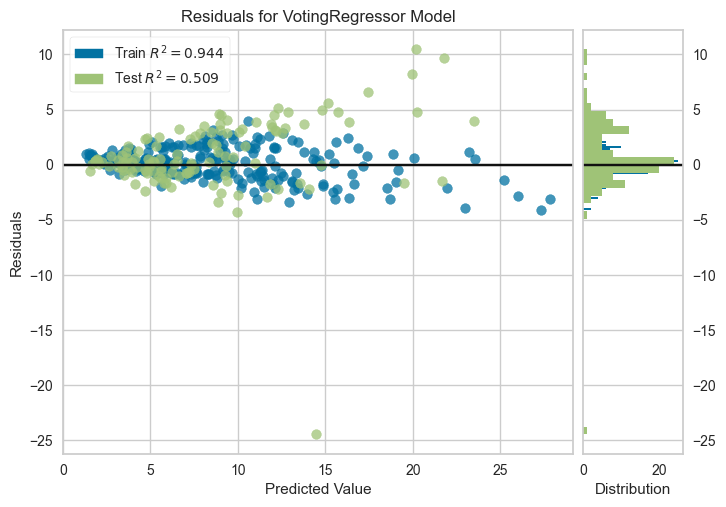

In [13]:
# plot residuals
plot_model(best, plot = 'residuals')

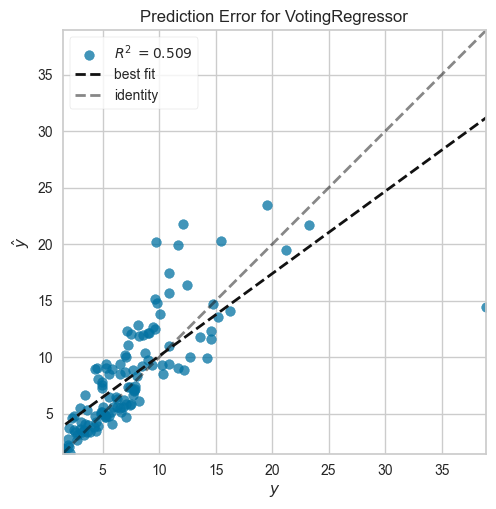

In [14]:
# plot error
plot_model(best, plot = 'error')

In [15]:
final_best = finalize_model(best)
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['kW_enc_kW_other', 'kW_enc_50',
                                             'kW_enc_120', 'kW_enc_25',
                                             'opening_time_enc_1',
                                             'cnt_chargers', 'p24',
                                             'growth_rate', 'zone',
                                             'basic_services', 'food_beverages',
                                             'leisure_entertainment',
                                             'shopping',
                                             'health_government_laundry',
                                             'car_services'],
                                    transformer=SimpleImputer...
                 VotingRegressor(estimators=[('AdaBoost Regressor',
                                              AdaBoostRegressor(random_state=123)),
                                             ('Random Forest Regressor',
                                              RandomForestRegressor(n_jobs=-1,
                                                                    random_state=123)),
                                             ('Extra Trees Regressor',
                                              ExtraTreesRegressor(n_jobs=-1,
                                                                  random_state=123)),
                                             ('Gradient Boosting Regressor',
                                              GradientBoostingRegressor(random_state=123)),
                                             ('Light Gradient Boosting Machine',
                                              LGBMRegressor(n_jobs=-1,
                                                            random_state=123))],
                                 n_jobs=-1))])

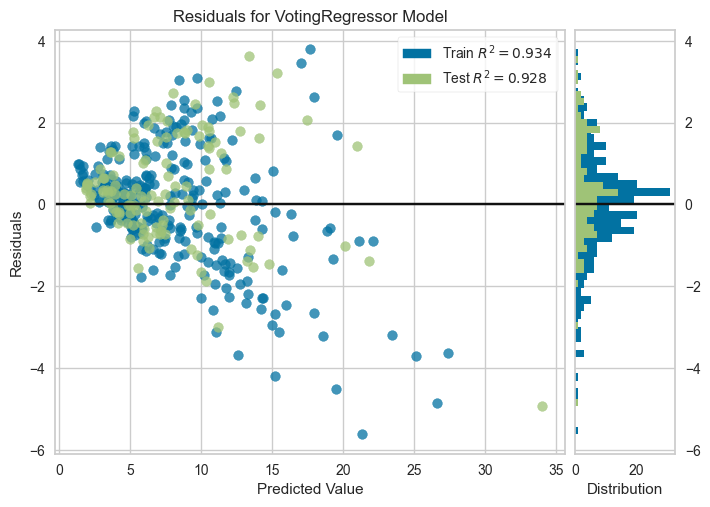

In [16]:
plot_model(final_best, plot = 'residuals')

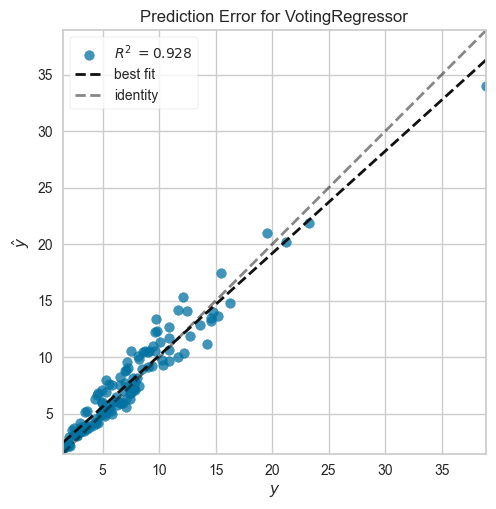

In [17]:
plot_model(final_best, plot = 'error')

In [18]:
# create gradio app
create_app(final_best)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
